In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.special import logsumexp
from scipy.stats import beta, truncnorm

In [189]:
def lnf(z, k, z0):
    return -np.log(1 + np.exp(-k * (z-z0)))

# def lnA(k, z0, a, b):
#     return -np.log(b - a + (lnf(a, k, z0) - lnf(b, k, z0)) / k)

def lnalpha(z, k, z0, a, b):
    # return lnA(k, z0, a, b) + lnf(z, k, z0)
    return np.logaddexp(np.log(a) + lnf(z, k, z0), np.log(b))

(0, 1)

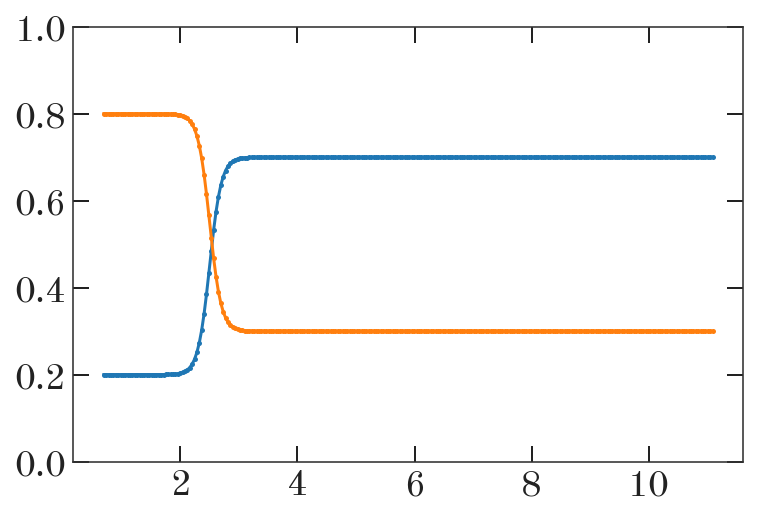

In [311]:
zgrid = np.linspace(np.log(2), np.log(65536), 256)
aa = np.exp(lnalpha(zgrid, 10., 2.5, 0.5, 0.2))
plt.plot(zgrid, aa)
plt.plot(zgrid, 1-aa)
plt.ylim(0, 1)

In [300]:
def lnnormal(x, mu, var):
    return -0.5*np.log(2*np.pi) - 0.5*np.log(var) - 0.5 * (x-mu)**2 / var

def lntruncnorm(x, mu, sigma, clip_a, clip_b):
    a, b = (clip_a - mu) / sigma, (clip_b - mu) / sigma
    return truncnorm.logpdf(x, a, b, loc=mu, scale=sigma)

muz = np.log(1e2)
varz = 5**2

a = 0.5
b = 0.2
lim = (np.log(2), np.log(65536))
k = 1.
z0 = np.log(1e2)

def lnze(z, e):
    lna1 = lnalpha(z, k, z0, a, b)
    lna2 = np.log(1 - np.exp(lna1))
    lnpe = np.logaddexp(lna1 + beta.logpdf(e, 5, 5),
                        lna2 + beta.logpdf(e, 1., 5))
    return lntruncnorm(z, muz, varz, *lim) + lnpe

In [301]:
zgrid = np.linspace(lim[0], lim[1], 252)
egrid = np.linspace(0, 1, 256)
zz, ee = np.meshgrid(zgrid, egrid)

In [302]:
lnval = lnze(zz, ee)
# lnval1, lnval2 = lnze(zz, ee)

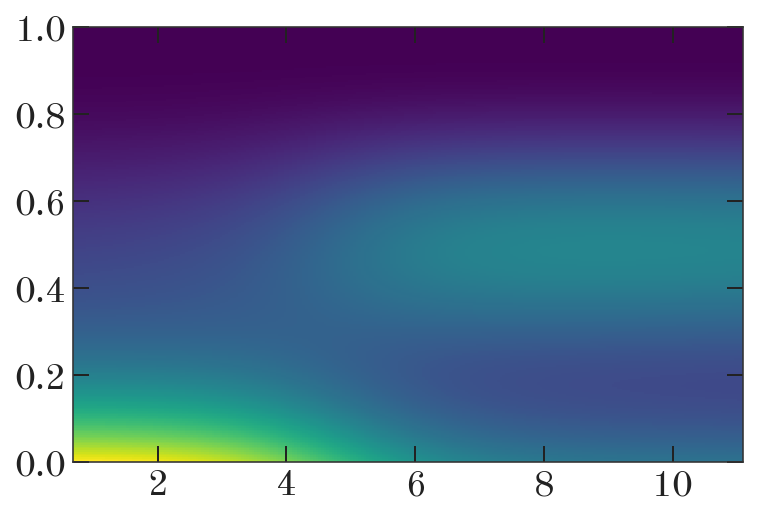

In [303]:
plt.pcolormesh(zz, ee, np.exp(lnval))

In [305]:
from astropy.io import fits

In [306]:
derp = fits.getdata('/Users/apricewhelan/data/APOGEE_DR16/allStar-r12-gaiadr2.fits')

In [307]:
derp.dtype.names

('solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'phot_g_n_ob

In [308]:
len(derp)

468273